<a href="https://colab.research.google.com/github/xxhyxayxx/ml-dl/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 1. データ作成
ここで、make_classification 関数は、二値分類用のデータセットを生成している

- n_samples=100：100個のサンプルデータ（データポイント）を生成。
- n_features=1：1つの特徴量（入力変数）を持つデータを生成。この例では、特徴量は1つだけなので、モデルは1次元のデータで学習。
- n_informative=1：1つの特徴量がターゲット（出力）に関連する「有効な」特徴として生成される。
- n_redundant=0：予測に無関係な「冗長な」特徴量は生成しない。
- n_clusters_per_class=1：クラスごとに1つのデータクラスタを生成。これにより、クラスが明確に分かれるシンプルなデータセットになる。
- random_state=42：乱数シードを指定して、実行ごとに同じデータセットが生成されるようにする。
これにより、二値分類用のラベル付きデータセットが作成され、X が特徴量（入力データ）、y がラベル（出力クラス、0か1）として返される。

In [2]:
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=0)

# 2. データの分割
- train_test_split は、データを訓練セットとテストセットに分割する関数。
- test_size=0.2 は、全体のデータの20％をテストセットに、残りの80％を訓練セットにする。
- random_state=0 は再現性のためのシードで、同じ分割が再現される。

訓練データとテストデータを分けるのは、モデルの性能を客観的に評価するため。機械学習モデルはデータを使って学習（訓練）を行うが、学習に使ったデータではなく、初見のデータに対しても良い予測ができるかどうかを確認する必要がある。これは、モデルが新しいデータにも適切に対応できる「汎化能力」を持っているかを評価するため。

#### 訓練用データとテスト用データの役割
- 訓練データ（Training Data）モデルが学習に使うデータ。ここでモデルはデータ内のパターンや規則性を見つけ、パラメータ（重みなど）を調整していく。
訓練データに対する誤差を最小化するように学習が進む。
- テストデータ（Test Data）訓練されたモデルの性能を評価するために使うデータ。
テストデータはモデルが「学習に使っていない」データなので、**未知のデータに対する予測力（汎化性能）**を確認するための指標となる。
テストデータでの性能が良ければ、モデルは新しいデータにも適切に対応できる可能性が高いと判断できる。

#### なぜ分けるのか：過学習を防ぐため
モデルが訓練データに対して高い精度を持っていたとしても、それが新しいデータに対しても適用できるとは限らない。過剰に訓練データに合わせて学習すると、訓練データにしか通用しない「過学習（オーバーフィッティング）」が発生する。過学習が起きると、新しいデータでは誤差が大きくなり、正確に予測できなくなる。

テストデータを使うことで、モデルが訓練データに過剰適合していないか（過学習していないか）を確認し、新しいデータでも適切な性能を発揮できるモデルかを評価できる。

クロスバリデーション（交差検証）もモデルの汎化性能を評価するために使われる重要な手法。クロスバリデーションは、データセットを訓練データとテストデータに分けるだけでなく、複数の組み合わせでモデルを評価することにより、より信頼性の高い性能評価が可能になる。



#### 用語
- X：特徴量（入力データ）で、ここでは100個のデータポイントが含まれる。
- y：各データポイントに対するラベル（0か1のクラス）で、目標となる出力。
- X_train、y_train：モデルの訓練に使うデータ。
- X_test、y_test：訓練後のモデルを評価するためのテストデータ。

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. シグモイド関数

シグモイド関数は **0か1の「確率」** を返すものだが、実際には0や1だけでなく、**0から1の範囲の連続的な値**を出力する。シグモイド関数は、「このデータがクラス1（たとえばYesやPositive）に属する確率」を表すもので、完全な0や1ではなく、確率値。

### シグモイド関数の役割
シグモイド関数は、入力の線形結合 $z = Xw + b$ を次のように確率値（0から1の範囲の連続値）に変換する：

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- $z$ が非常に大きい正の値なら、シグモイド関数の出力は1に近づく。
- $z$ が非常に小さい（大きな負の値）なら、シグモイド関数の出力は0に近づく。

### どのように0か1に変換するか？
ロジスティック回帰では、シグモイド関数の出力はあくまで**確率（0と1の間の値）**。この確率をもとに「0か1か」を決めるために、**閾値（しきい値）**を設定する。

#### 通常の設定
一般的に、閾値 **0.5** を用いて次のように分類する：

- シグモイド関数の出力が **0.5以上**なら「1」と予測（クラス1、Positive、Yesなど）。
- シグモイド関数の出力が **0.5未満**なら「0」と予測（クラス0、Negative、Noなど）。

### 例
たとえば、ロジスティック回帰で部屋の広さをもとに、ある物件が借り手に選ばれる確率を予測するとする。

1. 部屋の広さデータから線形結合 $z = Xw + b$ を計算した結果、$z = 1.2$ だったとする。
2. シグモイド関数で計算すると、出力はおよそ $\sigma(1.2) \approx 0.77$ 。
3. この確率0.77が、閾値0.5を超えているため、「1」と予測される。つまり、「この物件は借り手に選ばれる可能性が高い」と判断される。

In [5]:
# シグモイド関数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 4. 交差エントロピー損失

ロジスティック回帰では、モデルの出力が確率として表現される。交差エントロピー損失は、モデルの予測（確率）と実際のラベル（0または1）の間の**不確実性を最小化すること**を目的としている。これを達成するために、交差エントロピー損失の式は以下のように定義される：

$$
\text{Loss}(y, \hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

- この式は、**エントロピーの拡張**であり、実際のクラス $y_i$ と予測確率 $\hat{y}_i$ がどれだけ一致しているかを示すもの。
- 実際のラベルが1の場合は $-\log(\hat{y}_i)$、ラベルが0の場合は $-\log(1 - \hat{y}_i)$ を用いることで、モデルが正しい確率に近い予測をするほど、損失が小さくなる。

対数を使うことで、**確率が極端（0や1に近い）な場合に損失が大きく変化**するようにしている。これは、モデルが予測に自信を持っている（確率が1に近い）場合や全く自信がない（確率が0に近い）場合に大きな影響を与える。

- 正しいクラスの確率が高ければ、損失は非常に小さくなる。
- 誤ったクラスの確率が高いと損失が急激に大きくなり、モデルにペナルティを与えることになる。

In [6]:
# ロジスティック回帰のコスト関数と勾配
def compute_cost_and_gradients(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)

    return cost, dw, db

In [7]:
# 勾配降下法でロジスティック回帰を実行
def logistic_regression(X, y, learning_rate, n_iterations):
    w = np.random.randn(X.shape[1])
    b = 0
    cost_history = []

    for i in range(n_iterations):
        cost, dw, db = compute_cost_and_gradients(X, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return w, b, cost_history

In [8]:
# ハイパーパラメータ
learning_rate = 0.1
n_iterations = 1000

In [9]:
# 学習
w, b, cost_history = logistic_regression(X_train, y_train, learning_rate, n_iterations)

Iteration 0: Cost = 0.4691232576341091
Iteration 100: Cost = 0.10159220029244508
Iteration 200: Cost = 0.0557808519478645
Iteration 300: Cost = 0.03852966984352607
Iteration 400: Cost = 0.02949819436767824
Iteration 500: Cost = 0.023939716247646414
Iteration 600: Cost = 0.020171120601315057
Iteration 700: Cost = 0.017445738627975573
Iteration 800: Cost = 0.015381726994631965
Iteration 900: Cost = 0.013763495850134744


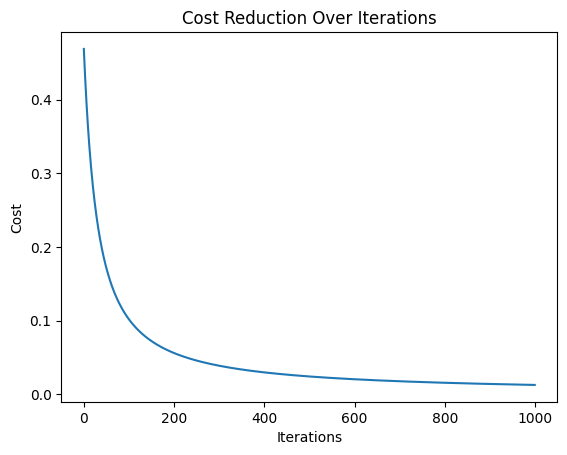

In [10]:
# コストの推移をプロット
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

In [11]:
# テストデータの予測と分類
y_pred_prob = sigmoid(np.dot(X_test, w) + b)
y_pred_class = (y_pred_prob >= 0.5).astype(int)

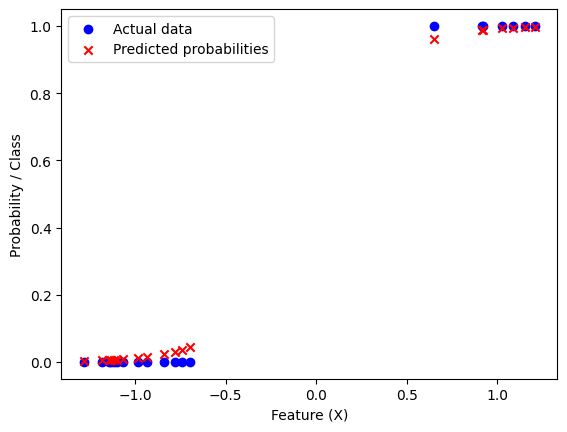

In [14]:
# データと学習結果のプロット
plt.scatter(X_test, y_test, color="blue", label="Actual data")
plt.scatter(X_test, y_pred_prob, color="red", marker='x', label="Predicted probabilities")
plt.xlabel("Feature (X)")
plt.ylabel("Probability / Class")
plt.legend()
plt.show()